[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imeri-course/ai-in-healthcare/blob/master/Session1/Demo_Gradient_Descent.ipynb)

# Practice Gradient Descent Using Pytorch Framework
This notebook provide you about Gradient descent in pytorch as deeplearning framework

## How is pytorch works ?
![dynamic graph](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/dynamic_graph.gif "Title")

## Tensor
### 1. How to make

In [17]:
import torch 
import numpy as np

In [18]:
arr = np.random.randn(3,5)
arr

array([[ 0.32905955,  0.11502424,  0.09434615,  0.61545198, -0.5150339 ],
       [ 0.23680987,  0.13434471, -0.30699594,  1.70868789,  0.3583368 ],
       [-1.41226854,  0.6194407 , -0.29026047,  0.54121348,  0.202942  ]])

In [19]:
tens = torch.from_numpy(arr)
tens

tensor([[ 0.3291,  0.1150,  0.0943,  0.6155, -0.5150],
        [ 0.2368,  0.1343, -0.3070,  1.7087,  0.3583],
        [-1.4123,  0.6194, -0.2903,  0.5412,  0.2029]], dtype=torch.float64)

In [20]:
another_tensor = torch.LongTensor([[2,4],[5,6]])
another_tensor

tensor([[2, 4],
        [5, 6]])

In [21]:
random_tensor = torch.randn((4,3))
random_tensor

tensor([[ 1.3452,  0.2372,  1.9607],
        [ 0.5163, -1.0342,  0.4659],
        [ 0.8233,  1.7400, -0.3184],
        [ 0.7457,  1.2461,  2.0492]])

## Example Graph

### Build Computation Graphs
Suppose, your model is described like this:
```
b = w1 * a
c = w2 * a 
d = (w3 * b) + (w4 * c)
L = f(d)
```
<!-- ![dynamic graph](https://miro.medium.com/max/842/1*FDL9Se9otGzz83F3rofQuA.png "Title") -->
![dynamic graph](https://miro.medium.com/max/1061/1*40LF-3EKdsZsbTP5JmzVjQ.png "Title")



### Chain rule compute gradients
The computation graph is simply a data structure that allows you to efficiently apply the chain rule to compute gradients for all of your parameters.
![dynamic graph](https://miro.medium.com/max/842/1*EWpoG5KayZSqkWmwM_wMFQ.png "Title")

In [29]:
from torch import FloatTensor
from torch.autograd import Variable

![dynamic graph](https://iaml.it/blog/fun-with-pytorch-part-1/images/Variable.png "Title") <br>
A variable is a small tensor's wrapper consisting of three major elements:

- `v.data` references to the raw tensor;
- `v.grad` accumulates the gradient computed on demand through the backward pass with respect to this variable;
- `v.grad_fn` is used by PyTorch to link the root element of the computational graph containing the applied operations.

In [121]:
# Define the leaf nodes or input
a = Variable(FloatTensor([4]))

# Define the weights
weights = [Variable(FloatTensor([i]), requires_grad=True) for i in (2, 5, 9, 7)]

# unpack the weights for nicer assignment
w1, w2, w3, w4 = weights

b = w1 * a
c = w2 * a
d = w3 * b + w4 * c
L = (10 - d)

In [122]:
w1

tensor([2.], requires_grad=True)

In [123]:
w2

tensor([5.], requires_grad=True)

In [124]:
L

tensor([-202.], grad_fn=<RsubBackward1>)

### Calculate Gradient

In [125]:
L.backward()
print("*(w.r.t) with respect to")
for index, weight in enumerate(weights, start=1):
    gradient, *_ = weight.grad.data
    print(f"Gradient of w{index} w.r.t to L: {gradient}")

*(w.r.t) with respect to
Gradient of w1 w.r.t to L: -36.0
Gradient of w2 w.r.t to L: -28.0
Gradient of w3 w.r.t to L: -8.0
Gradient of w4 w.r.t to L: -20.0


### update the wieghts using GD
```
weight = weight - learning_rate * gradient
```

In [126]:
# manual GD
learning_rate = 0.01

In [127]:
# This 
w1.data = w1.data - learning_rate * w1.grad.data
w2.data = w2.data - learning_rate * w2.grad.data
w3.data = w3.data - learning_rate * w3.grad.data
w4.data = w4.data - learning_rate * w4.grad.data

In [117]:
# Or This
w1.data.sub_(w1.grad.data * learning_rate)
w2.data.sub_(w2.grad.data * learning_rate)
w3.data.sub_(w3.grad.data * learning_rate)
w4.data.sub_(w4.grad.data * learning_rate)

tensor([7.4000])

### **Important!** make gradient zero, after update weights

In [128]:
w4.grad.data

tensor([-20.])

In [129]:
w4.grad.data.zero_()

tensor([0.])

# Further Reading
- [Backprop](http://colah.github.io/posts/2015-08-Backprop/)
- [Understanding Graphs and Automatic Differentiation](https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/)

# Home Work Challenge!

In [32]:
assert False, "Stop Here for run through"

AssertionError: Stop Here for run through

In [150]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch

In [159]:
X = np.random.rand(30, 1)*2.0
w = np.random.rand(2, 1)
y = X*w[0] + w[1] + np.random.randn(30, 1) * 0.05

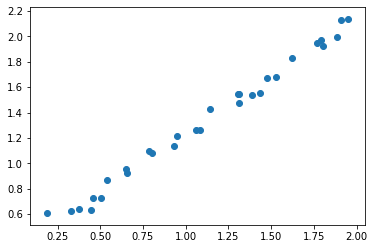

In [160]:
plt.scatter(X, y)

In [170]:
from torch import FloatTensor
from torch.autograd import Variable

W = Variable(torch.rand(1, 1), requires_grad=True)
b = Variable(torch.rand(1), requires_grad=True)

def linear(x):
    return x*W + b

Xt = Variable(torch.from_numpy(X)).float()
yt = Variable(torch.from_numpy(y)).float()

### Before Train

Text(0, 0.5, 'Acc')

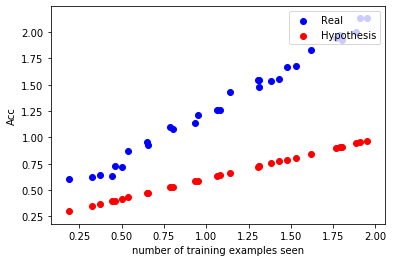

In [171]:
# Before Train
fig = plt.figure()
plt.scatter(X, y, color='blue')
pred = linear(torch.from_numpy(X).float())
plt.scatter(X, pred.detach().numpy(), color='red')
plt.legend(['Real', 'Hypothesis'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('Acc')

### Code Here

In [168]:
from torch import FloatTensor
from torch.autograd import Variable

W = Variable(torch.rand(1, 1), requires_grad=True)
b = Variable(torch.rand(1), requires_grad=True)

def linear(x):
    """
    Linear Function
    """
    return x*W + b

Xt = Variable(torch.from_numpy(X)).float()
yt = Variable(torch.from_numpy(y)).float()

def criterion(prediction, y):
    """
    Calculate MSE (Mean Square Error) loss between prediction and label y
    """
    return torch.sum((prediction - y)**2)

learning_rate = 0.01
epochs = 100
for i in range(epochs):
    prediction = linear(Xt)
    loss = criterion(prediction, yt)
    # Code Here ################
    # Steps :
    # 1. Backpropagation the loss
    # 2. Update Weights using GD 
    # 3. Make Gradient Zero
    
    ############################

### After

Text(0, 0.5, 'Acc')

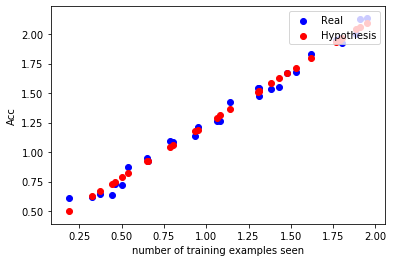

In [164]:
# Result After Train
fig = plt.figure()
plt.scatter(X, y, color='blue')
pred = linear(torch.from_numpy(X).float())
plt.scatter(X, pred.detach().numpy(), color='red')
plt.legend(['Real', 'Hypothesis'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('Acc')